# 속성 데이터 회귀 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/car_regression.csv

--2022-01-24 00:23:17--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/car_regression.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58697 (57K) [text/plain]
Saving to: ‘car_regression.csv’

car_regression.csv  100%[===================>]  57.32K  --.-KB/s    in 0.004s  

2022-01-24 00:23:17 (15.8 MB/s) - ‘car_regression.csv’ saved [58697/58697]



In [7]:
raw_data = pd.read_csv("car_regression.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)


In [13]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,-1.338361,1.482053,1.028134,0.637305,0.225353,-1.283618,-0.265923,1.0,0.0,0.0
1,-0.441501,-0.862911,-0.615534,-0.064155,0.202985,0.057514,0.005540,0.0,1.0,0.0
2,1.095974,-0.862911,-1.179351,-1.025414,-1.343985,1.978595,-0.537387,0.0,0.0,1.0
3,-0.313378,-0.862911,-0.519972,-0.843554,-0.678811,1.434893,-0.808850,1.0,0.0,0.0
4,-1.082115,1.482053,1.028134,0.663285,1.550991,-0.232460,0.277004,1.0,0.0,0.0


In [8]:
data

array([[-1.3383611 ,  1.48205303,  1.02813354, ...,  1.        ,
         0.        ,  0.        ],
       [-0.44150097, -0.86291079, -0.61553445, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.09597353, -0.86291079, -1.1793508 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.81410321, -0.86291079, -1.00733903, ...,  0.        ,
         1.        ,  0.        ],
       [-1.46648397,  1.48205303,  2.24177212, ...,  1.        ,
         0.        ,  0.        ],
       [-1.21023822,  1.48205303,  1.18103289, ...,  1.        ,
         0.        ,  0.        ]])

In [9]:
x = data[:,1:]
y = data[:,:1]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [10]:
print(train_x[:5])
print(train_y[:5])

[[ 1.48205303  1.02813354  0.63730509  0.22535347 -1.2836176  -0.26592342
   1.          0.          0.        ]
 [-0.86291079 -0.61553445 -0.06415467  0.20298481  0.05751406  0.00554007
   0.          1.          0.        ]
 [-0.86291079 -1.1793508  -1.02541435 -1.34398486  1.97859454 -0.53738692
   0.          0.          1.        ]
 [-0.86291079 -0.51997236 -0.84355441 -0.67881145  1.43489251 -0.80885042
   1.          0.          0.        ]
 [ 1.48205303  1.02813354  0.66328508  1.55099111 -0.23246035  0.27700357
   1.          0.          0.        ]]
[[-1.3383611 ]
 [-0.44150097]
 [ 1.09597353]
 [-0.31337809]
 [-1.08211534]]


In [11]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 9)
(313, 1)
(79, 9)
(79, 1)


# Template

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


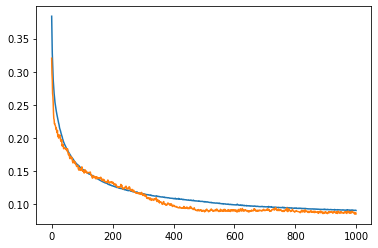

3/3 [==============================] - 0s 4ms/step - loss: 0.1414 - mape: 75.8041
loss= 0.1414271742105484
mape= 75.8040771484375


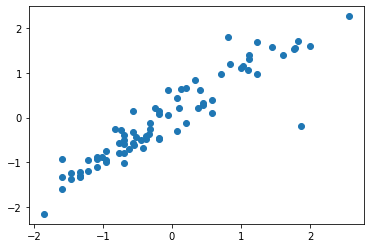

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(9,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()